In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()


# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [2]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [3]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## EarlyStopping callbacks

In [8]:
# validation loss 三個執行週期沒改善就停止訓練
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_accuracy'),
]

In [9]:
# 訓練 20 次，但實際只訓練 13次就停止了
history = model.fit(x_train_norm, y_train, epochs=20, validation_split=0.2, callbacks=my_callbacks)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 74us/sample - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0852 - val_accuracy: 0.9780
Epoch 2/20
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0787 - val_accuracy: 0.9803
Epoch 3/20
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0301 - accuracy: 0.9894 - val_loss: 0.0897 - val_accuracy: 0.9774
Epoch 4/20
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0902 - val_accuracy: 0.9778
Epoch 5/20
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0263 - accuracy: 0.9911 - val_loss: 0.0887 - val_accuracy: 0.9781


([<matplotlib.axis.XTick at 0x203a8945e48>,
 <a list of 5 Text xticklabel objects>)

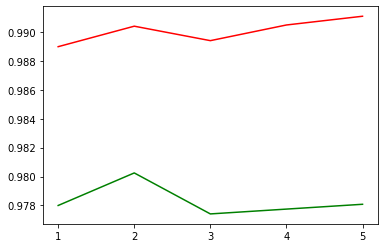

In [14]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5], history.history['accuracy'], 'r')
plt.plot([1,2,3,4,5], history.history['val_accuracy'], 'g')
plt.xticks([1,2,3,4,5])

In [7]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.08174725284399464, 0.9779]

## TensorBoard callback

In [17]:
# 定義 tensorboard callback
tensorboard_callback = [tf.keras.callbacks.TensorBoard(log_dir='.\\logs')]

# 訓練 10 次
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2, callbacks=tensorboard_callback)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 86us/sample - loss: 0.0260 - accuracy: 0.9908 - val_loss: 0.0920 - val_accuracy: 0.9780
Epoch 2/10
48000/48000 [==============================] - 4s 84us/sample - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0928 - val_accuracy: 0.9783
Epoch 3/10
48000/48000 [==============================] - 4s 77us/sample - loss: 0.0245 - accuracy: 0.9918 - val_loss: 0.0895 - val_accuracy: 0.9792
Epoch 4/10
48000/48000 [==============================] - 4s 81us/sample - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0940 - val_accuracy: 0.9792
Epoch 5/10
48000/48000 [==============================] - 4s 87us/sample - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.0924 - val_accuracy: 0.9803
Epoch 6/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.0924 - val_accuracy: 0.9793
Epoch 7/10
48000/48000 [==============================] 

In [4]:
# 定義 ModelCheckpoint callback
checkpoint_filepath = '.\\tmp\\checkpoint'
model_checkpoint_callback = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True)]

# 訓練 10 次
model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2, callbacks=model_checkpoint_callback)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 95us/sample - loss: 0.3235 - accuracy: 0.9047 - val_loss: 0.1569 - val_accuracy: 0.9548
Epoch 2/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.1549 - accuracy: 0.9536 - val_loss: 0.1147 - val_accuracy: 0.9659
Epoch 3/10
48000/48000 [==============================] - 6s 117us/sample - loss: 0.1181 - accuracy: 0.9641 - val_loss: 0.0988 - val_accuracy: 0.9707
Epoch 4/10
48000/48000 [==============================] - 4s 84us/sample - loss: 0.0942 - accuracy: 0.9714 - val_loss: 0.0920 - val_accuracy: 0.9717
Epoch 5/10
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0815 - accuracy: 0.9742 - val_loss: 0.0848 - val_accuracy: 0.9737
Epoch 6/10
48000/48000 [==============================] - 4s 86us/sample - loss: 0.0695 - accuracy: 0.9778 - val_loss: 0.0807 - val_accuracy: 0.9770
Epoch 7/10
48000/48000 [==============================]

In [5]:
# 載入最近的檢查點的權重
model.load_weights(checkpoint_filepath)
# 訓練 5 次
model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2, callbacks=model_checkpoint_callback)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 82us/sample - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 2/5
48000/48000 [==============================] - 4s 87us/sample - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.0824 - val_accuracy: 0.9768
Epoch 3/5
48000/48000 [==============================] - 4s 81us/sample - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0807 - val_accuracy: 0.9777
Epoch 4/5
48000/48000 [==============================] - 4s 79us/sample - loss: 0.0335 - accuracy: 0.9885 - val_loss: 0.0769 - val_accuracy: 0.9796
Epoch 5/5
48000/48000 [==============================] - 5s 96us/sample - loss: 0.0328 - accuracy: 0.9888 - val_loss: 0.0831 - val_accuracy: 0.9778
